# **Objetivo del notebook**

En esta etapa vamos a limpiar y preparar los datos: realizaremos una limpieza exhaustiva de los comentarios de texto, eliminando caracteres especiales, convirtiendo el texto a minúsculas y tokenizando las palabras.

Como estamos trabajando con textos y vamos entrenar un modelo de NLP, el preprocesamiento de los datos en este caso consistirá en distintos pasos de limpieza del texto para dejarlo listo para el modelo.



# **Contenido del Notebook**

1. Ingeniería de características
2. Eliminar columnas innecesarias
3. Regex: Limpieza y filtrado de texto
4. Tokenización: Divide los comentarios en palabras o tokens
5. Stopwords: Eliminación de palabras vacías
6. Lematización: Normalización de las palabras
7. Vectorizar: ^_^
8. Prueba con modelo de modelo

In [ ]:
!pip instal wordcloud > /dev/null 2>&1

In [ ]:
!pip install wordcloud > /dev/null 2>&1

In [ ]:
# Data analysis libraries
import numpy as np
import pandas as pd
import math
from scipy import stats
from tabulate import tabulate

# Data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud

# Data cleaning
import re
import spacy
from spacy.tokenizer import Tokenizer
from spacy.lang.en import English

# Machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import GradientBoostingClassifier

/shared-libs/python3.9/py/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2023-11-07 10:53:12.967226: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-07 10:53:13.201589: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-11-07 10:53:13.201649: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-11-07 

In [ ]:
# read csv file
path = "/work/youtoxic_english_1000.csv"
df = pd.read_csv(path)

## **1. Ingeniería de características**

Inicialmente vamos a usar 'IsToxic' como variable objetivo.
En una siguiente vuelta de Scrum queremos probar a crear una nueva columna a partir de los 'True' de las ya existentes, y usarla como variable objetivo.

## **2. Eliminar columnas innecesarias**

## **3. Regex: Limpieza y filtrado de texto**

In [ ]:
# Copia de 'df' para contar antes de cualquier limpieza
df_copia = df.copy()

In [ ]:
# Conteo de palabras y caracteres antes de la limpieza
total_caracteres_inicial = df_copia['Text'].str.len().sum()
total_palabras_inicial = df_copia['Text'].str.split().apply(len).sum()

print(f"Total de caracteres inicial: {total_caracteres_inicial}")
print(f"Total de palabras inicial: {total_palabras_inicial}")

Total de caracteres inicial: 185554
Total de palabras inicial: 33776


In [ ]:
def limpieza_regex(text):
  text = str(text).lower() # Convierte el texto a minúsculas
  text = re.sub('\n', '', text)  # Elimina saltos de línea
  text = re.sub('\w*\d\w*', '', text)  # Elimina palabras que contienen números
  text = re.sub('\[|\]', '', text) # Elimina corchetes
  text = re.sub(r"\@w+|\#w+",'',text)  # Elimina menciones y hashtags de redes sociales
  text = re.sub('https?://\S+|www\.\S+', '', text)  # Elimina URLs que comiencen con http, https o www
  text = re.sub('<.*?>+', '', text)  # Elimina etiquetas HTML
  text = re.sub(r"[^\w\s]",'',text)  # Elimina caracteres no alfanuméricos
  #text = re.sub('[%s]' % re.escape(string.punctuation), '', text)  # Elimina signos de puntuación
  text = re.sub('\xa0', '', text)  # Elimina el carácter \xa0
  text = re.sub(' +', ' ', text)  # Reemplaza múltiples espacios por uno solo
  text = text.strip() # Elimina espacios antes y despues
    
  return text

In [ ]:
df['Text'] = df['Text'].apply(limpieza_regex)

In [ ]:
df.to_csv("Youtube_limpio_version4.csv", index=False)

In [ ]:

 " michael smerconish hack " 
"     leaving out information when giving a police report because they didnt ask you for that info is lying by omission thats why its not outright lyingbecause you omitted the information these are some stupid lawyers"
"moly loooooooooooooooooooooooves cops  there are other witnesses  also clueless about the riots  also about the decades of police violence and repression in the areaalso ignorant of the effects of marijuana"
"right on finally some sane opinion on this event these black bastards are soooooooooo ignorant running around yelling and looting and carrying on just like in la riots same old shit"
"blacklivesdontmatter"
"a thug going to college  black people  are always  crying    what about the american indians  i dont see no one crying for them  "
"xdddddddddddddddd"
"lmfao"

'lmfao'

## **4. Tokenización: Divide los comentarios en palabras o tokens**

In [ ]:
!python -m spacy download en_core_web_sm > /dev/null 2>&1

In [ ]:
# Instanciamos el modelo
nlp_english = spacy.load("en_core_web_sm")

In [ ]:
# Función para tokenizar el texto
def tokenizar_texto(text):
    doc = nlp_english(text)
    return doc


In [ ]:
# Aplicar la función tokenizar a la columna 'Text'
df['Tokens'] = df['Text'].apply(tokenizar_texto)

In [ ]:
# Imprimir todos los tokens tokens del primer registro
print(df['Tokens'][0])

if only people would just take a step back and not make this case about them because it wasnt about anyone except the two people in that situation to lump yourself into this mess and take matters into your own hands makes these kinds of protests selfish and without rational thought and investigation the guy in this video is heavily emotional and hyped up and wants to be heard and when he gets heard he just presses more and more he was never out to have a reasonable discussion kudos to the smerconish for keeping level the whole time and letting masri make himself out to be a fool how dare he and those that tore that city down in protest make this about themselves and to dishonor the entire incident with their own hate by the way since when did police brutality become an epidemic i wish everyone would just stop pretending like they were there and they knew exactly what was going on because theres no measurable amount of people that honestly witnessed this incident so none of us have a cl

In [ ]:
# Acceder a los tokens del primer registro e imprimir el texto de cada token individualmente
print([token.text for token in df['Tokens'][0]])

['if', 'only', 'people', 'would', 'just', 'take', 'a', 'step', 'back', 'and', 'not', 'make', 'this', 'case', 'about', 'them', 'because', 'it', 'was', 'nt', 'about', 'anyone', 'except', 'the', 'two', 'people', 'in', 'that', 'situation', 'to', 'lump', 'yourself', 'into', 'this', 'mess', 'and', 'take', 'matters', 'into', 'your', 'own', 'hands', 'makes', 'these', 'kinds', 'of', 'protests', 'selfish', 'and', 'without', 'rational', 'thought', 'and', 'investigation', 'the', 'guy', 'in', 'this', 'video', 'is', 'heavily', 'emotional', 'and', 'hyped', 'up', 'and', 'wants', 'to', 'be', 'heard', 'and', 'when', 'he', 'gets', 'heard', 'he', 'just', 'presses', 'more', 'and', 'more', 'he', 'was', 'never', 'out', 'to', 'have', 'a', 'reasonable', 'discussion', 'kudos', 'to', 'the', 'smerconish', 'for', 'keeping', 'level', 'the', 'whole', 'time', 'and', 'letting', 'masri', 'make', 'himself', 'out', 'to', 'be', 'a', 'fool', 'how', 'dare', 'he', 'and', 'those', 'that', 'tore', 'that', 'city', 'down', 'in',

## **4. Stopwords: Eliminación de palabras vacías**

In [ ]:
# Funcion para eliminar Stopwords
def eliminar_stop_words(text):
    doc = nlp_english(text)
    tokens = [token.text for token in doc if not token.is_stop]
    return " ".join(token for token in tokens)

In [ ]:
# Aplicamos la funcion en la columna objetivo 
df['Text'] = df['Text'].apply(eliminar_stop_words)

In [ ]:
# Imprimir tokens para el primer registro
print(df['Text'][0])

people step case nt people situation lump mess matters hands makes kinds protests selfish rational thought investigation guy video heavily emotional hyped wants heard gets heard presses reasonable discussion kudos smerconish keeping level time letting masri fool dare tore city protest dishonor entire incident hate way police brutality epidemic wish stop pretending like knew exactly going s measurable people honestly witnessed incident clue way issue swung grand jury informed trust majority rule right course action let thank police officers americathat actually serve protect bit jerk pull respect job know people going pout held accountable actions people hate police need officer emergency


In [ ]:
df.head(10)

,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism,Tokens
0,Ugg2KwwX0V8-aXgCoAEC,04kJtp6pVXI,people step case nt people situation lump mess...,False,False,False,False,False,False,False,False,False,False,False,False,"(if, only, people, would, just, take, a, step,..."
1,Ugg2s5AzSPioEXgCoAEC,04kJtp6pVXI,law enforcement trained shoot apprehend traine...,True,True,False,False,False,False,False,False,False,False,False,False,"(law, enforcement, is, not, trained, to, shoot..."
2,Ugg3dWTOxryFfHgCoAEC,04kJtp6pVXI,nt reckon black lives matter banners held whit...,True,True,False,False,True,False,False,False,False,False,False,False,"(do, nt, you, reckon, them, black, lives, matt..."
3,Ugg7Gd006w1MPngCoAEC,04kJtp6pVXI,large number people like police officers calle...,False,False,False,False,False,False,False,False,False,False,False,False,"(there, are, a, very, large, number, of, peopl..."
4,Ugg8FfTbbNF8IngCoAEC,04kJtp6pVXI,arab dude absolutely right shot extra time sho...,False,False,False,False,False,False,False,False,False,False,False,False,"(the, arab, dude, is, absolutely, right, he, s..."
5,Ugg9a6FtoXdxmXgCoAEC,04kJtp6pVXI,people facebook ties isis terrorist groups mus...,True,False,False,False,False,True,False,False,False,False,True,False,"(here, people, his, facebook, is, he, has, tie..."
6,Ugga9KzkNDGvlXgCoAEC,04kJtp6pVXI,check tube post black man goes epic rant fergu...,True,False,False,False,False,True,True,False,False,False,False,False,"(check, out, this, you, tube, post, black, man..."
7,UggBlIXoph7p-3gCoAEC,04kJtp6pVXI,love pussy staten island spit cop love happen ...,True,True,False,False,True,True,True,False,False,False,False,False,"(i, would, love, to, see, this, pussy, go, to,..."
8,UggD1aYSn7KOR3gCoAEC,04kJtp6pVXI,agree protestor,False,False,False,False,False,False,False,False,False,False,False,False,"(i, agree, with, the, protestor)"
9,UggGm8a1fu8brngCoAEC,04kJtp6pVXI,mike browns father boooshit,True,True,False,False,True,False,False,False,False,False,False,False,"(mike, browns, father, was, made, to, say, tha..."


In [ ]:
df.to_csv("Youtube_limpio_stop_words.csv", index=False)

## **6. Lematización: Normalización de las palabras**

In [ ]:
# Función para lematizar una lista de tokens
def lemmatize_tokens(tokens):
    return [token.lemma_ for token in tokens]

In [ ]:
# Aplicar la lematización a cada lista de tokens en 'Tokens'
df['Tokens'] = df['Tokens'].apply(lemmatize_tokens)

In [ ]:
# Convertir los tokens lematizados de listas a cadenas de texto nuevamente para usar TF-IDF
df['Text'] = df['Tokens'].apply(lambda tokens: ' '.join(tokens))

In [ ]:
# Imprimir tokens para el primer registro
print(df['Text'][0])

if only people would just take a step back and not make this case about they because it be not about anyone except the two people in that situation to lump yourself into this mess and take matter into your own hand make these kind of protest selfish and without rational thought and investigation the guy in this video be heavily emotional and hype up and want to be hear and when he gets hear he just press more and more he be never out to have a reasonable discussion kudo to the smerconish for keep level the whole time and let masri make himself out to be a fool how dare he and those that tear that city down in protest make this about themselves and to dishonor the entire incident with their own hate by the way since when do police brutality become an epidemic I wish everyone would just stop pretend like they be there and they know exactly what be go on because there s no measurable amount of people that honestly witness this incident so none of we have a clue on which way this whole iss

In [ ]:
df.to_csv("Youtube_limpio_lemmatize.csv", index=False)

In [ ]:
# Conteo de palabras y caracteres después de la limpieza
total_caracteres_final = df['Text'].str.len().sum()
total_palabras_final = df['Text'].str.split().apply(len).sum()

# Mostrar resultados
print(f"Total de caracteres inicial: {total_caracteres_inicial}")
print(f"Total de palabras inicial: {total_palabras_inicial}")
print(f"Total de caracteres final: {total_caracteres_final}")
print(f"Total de palabras final: {total_palabras_final}")

Total de caracteres inicial: 185554
Total de palabras inicial: 33776
Total de caracteres final: 170775
Total de palabras final: 33472


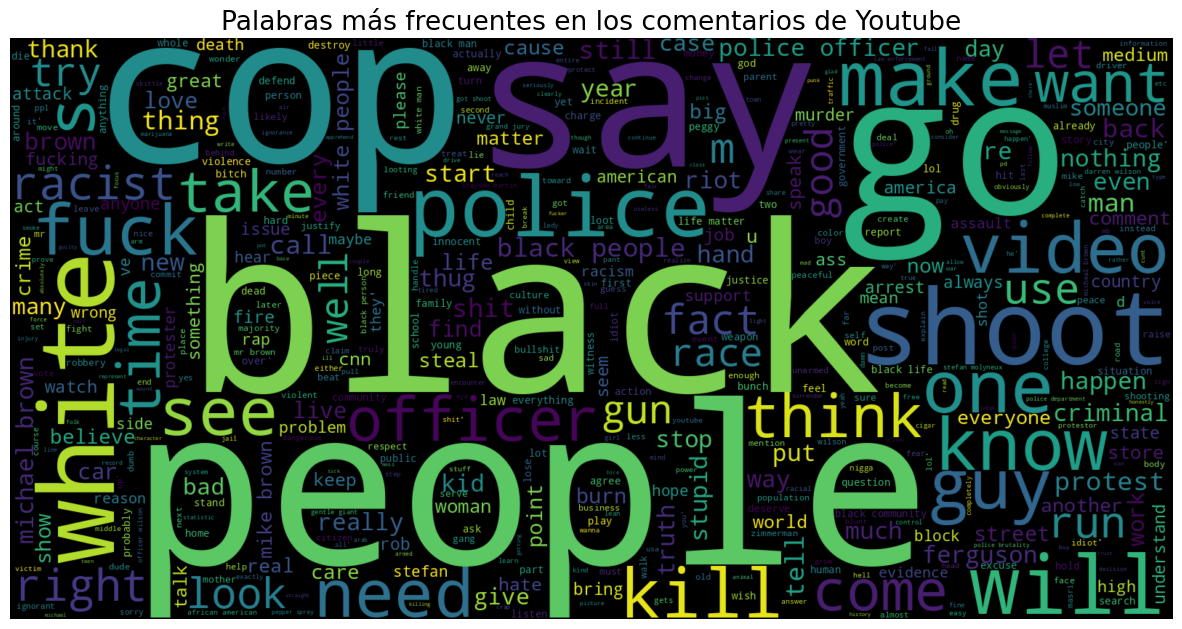

In [ ]:
text = df['Text'].values

# Nube de palabras más frecuentes en los comentarios de Youtube
wordcloud=WordCloud(max_words=500, width=1600, height=800).generate(str(text))
plt.figure(figsize=(15,12), facecolor='None')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Palabras más frecuentes en los comentarios de Youtube", fontsize=19)
plt.show()

## **7. Vectorizar**

In [ ]:
# Preparación de datos para el modelo
X = df['Text']  # Datos de entrada
y = df['IsToxic']  # Etiquetas de clasificación (mensaje de odio o no)

In [ ]:
# División de los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Crear el vectorizador TF-IDF
tfidf = TfidfVectorizer(ngram_range=(1, 5))

# Ajustar y transformar los datos de entrenamiento
X_train_tfidf = tfidf.fit_transform(X_train)

# Transformar los datos de prueba
X_test_tfidf = tfidf.transform(X_test)

## **8. Prueba con modelo de modelo**

Probamos a entrenar de forma sencilla un modelo para verificar que los pasos anteriores funcionan. La parte de modelado y ajuste de hiperparámetros se desarrollará de forma más detallada en otro notebook.

In [ ]:
# Crear y entrenar el modelo Gradient Boosting
gb = GradientBoostingClassifier()
gb.fit(X_train_tfidf, y_train)

GradientBoostingClassifier()

In [ ]:
# Evaluar el modelo
accuracy = gb.score(X_test_tfidf, y_test)
print(f'Accuracy: {accuracy}')

Accuracy: 0.65


##

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=22be43cf-6e58-4d4e-8694-3183dc7644ab' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>